In [1]:
import pandas as pd
data = pd.read_csv('data/flower.csv')
data.isna().sum()

Petal Length    0
Petal Width     0
dtype: int64

In [2]:
data.head()

,Petal Length,Petal Width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [7]:
data.describe()

,Petal Length,Petal Width
count,150.000000,150.000000
mean,3.758667,1.198667
std,1.764420,0.763161
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [22]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
#run kmeans on the data
model.fit(data)
#get the cluster assignments
cluster_assignments = model.predict(data)
print('WCSS score at k=2 for Kmeans:',model.inertia_)

WCSS score at k=2 for Kmeans: 13.933308757908758


In [23]:
cluster_assignments

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 3, 1, 3, 1, 1, 3, 2, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 1, 1, 3, 2, 1, 3, 2, 2, 1, 1, 3, 3,
       1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1])

In [14]:
wcss = []
for i in range(1,11,1):
    model = KMeans(n_clusters=i)
    model.fit(data)
    wcss.append(model.inertia_)

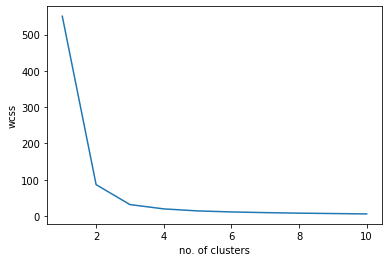

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),wcss)
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.show()

The elbow method tells us to use no of clusters = 3

In [24]:
model = KMeans(n_clusters=3)
#run kmeans on the data
model.fit(data)
#get the cluster assignments
cluster_assignments = model.predict(data)

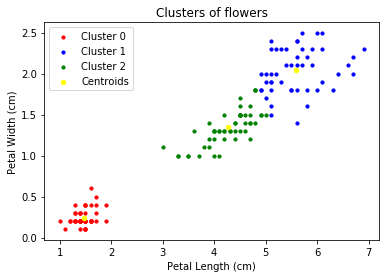

In [27]:
# Visualising the clusters
plt.scatter(data.iloc[cluster_assignments == 0, 0], data.iloc[cluster_assignments == 0, 1],
            s = 10, c = 'red', label = 'Cluster 0')
plt.scatter(data.iloc[cluster_assignments == 1, 0], data.iloc[cluster_assignments == 1, 1],
            s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(data.iloc[cluster_assignments == 2, 0], data.iloc[cluster_assignments == 2, 1],
            s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], 
            s = 20, c = 'yellow', label = 'Centroids')
plt.title('Clusters of flowers')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

Unsupervised Learning as a pre-step for supervised learning

In [29]:
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data

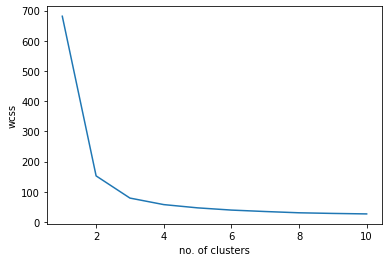

In [31]:
wcss = []
for i in range(1,11,1):
    model = KMeans(n_clusters=i)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(1,11,1),wcss)
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.show()

In [38]:
model = KMeans(n_clusters=3)
#run kmeans on the data
model.fit(data)
#get the cluster assignments
y = model.predict(data)

In [39]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
#testing the unsupervised learning model's predictions as labels for supervised learning
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=1/3)

In [44]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.96

In [45]:
#test it with actual labels
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=1/3)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.98